In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from keras.metrics import Accuracy
#from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.sequence import TimeseriesGenerator

from keras.layers import Dense, LSTM, Dropout, GRU

dataset = pd.read_excel("dataset_input_1.xlsx")
features = dataset.drop(columns=["Rozsev5mm"])
targets = dataset["Rozsev5mm"]



scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.3, random_state=1234, shuffle=True)
n_input = 1
n_features = X_train.shape[1]

X_train = X_train.reshape(X_train.shape[0], n_input, n_features)
X_test = X_test.reshape(X_test.shape[0], n_input, n_features)

In [3]:
tf.keras.optimizers.Adam(
   learning_rate=0.001,
   beta_1=0.9,
   beta_2=0.999,
   epsilon=1e-07,
   amsgrad=False,
   name="Adam"
)

In [4]:
model = Sequential()
model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='Adam')

In [ ]:
# #Train the model
# model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data = (X_test, y_test))

In [5]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=250,
)

Epoch 1/250
108/108 [==============================] - 7s 17ms/step - loss: 61.5424 - val_loss: 15.5673
Epoch 2/250
108/108 [==============================] - 1s 8ms/step - loss: 15.5476 - val_loss: 13.3773
Epoch 3/250
108/108 [==============================] - 1s 7ms/step - loss: 14.3402 - val_loss: 12.9028
Epoch 4/250
108/108 [==============================] - 1s 7ms/step - loss: 13.7627 - val_loss: 12.8325
Epoch 5/250
108/108 [==============================] - 1s 7ms/step - loss: 13.6022 - val_loss: 12.6909
Epoch 6/250
108/108 [==============================] - 1s 8ms/step - loss: 13.4885 - val_loss: 12.6498
Epoch 7/250
108/108 [==============================] - 1s 7ms/step - loss: 13.4473 - val_loss: 12.6787
Epoch 8/250
108/108 [==============================] - 1s 7ms/step - loss: 13.3773 - val_loss: 12.6235
Epoch 9/250
108/108 [==============================] - 1s 7ms/step - loss: 13.4064 - val_loss: 12.6575
Epoch 10/250
108/108 [==============================] - 1s 7ms/step - lo

In [6]:
predictions = model.predict(X_test)

93/93 [==============================] - 1s 2ms/step


In [7]:
predictions_train = model.predict(X_train)

216/216 [==============================] - 1s 3ms/step


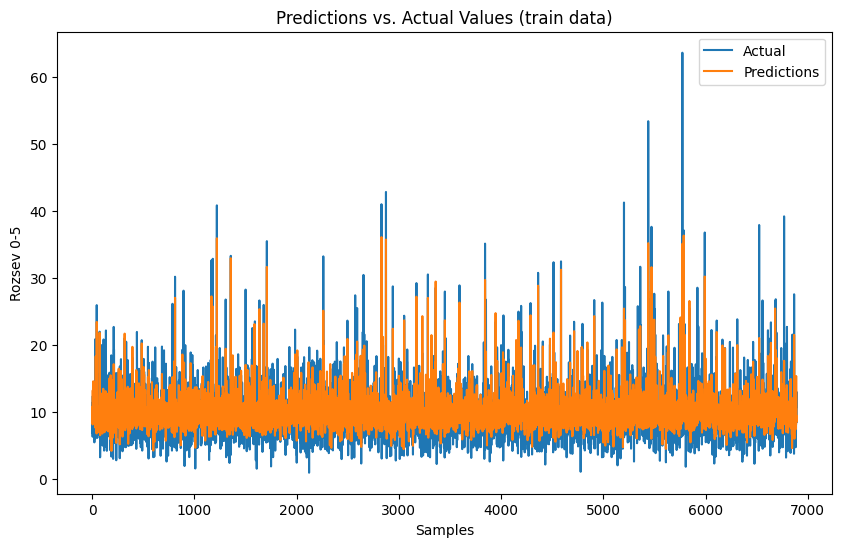

In [9]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_train.values, label='Actual')
plt.plot(predictions_train, label='Predictions')
plt.xlabel('Samples')
plt.ylabel('Rozsev 0-5')
plt.title('Predictions vs. Actual Values (train data)')
plt.legend()
plt.show()

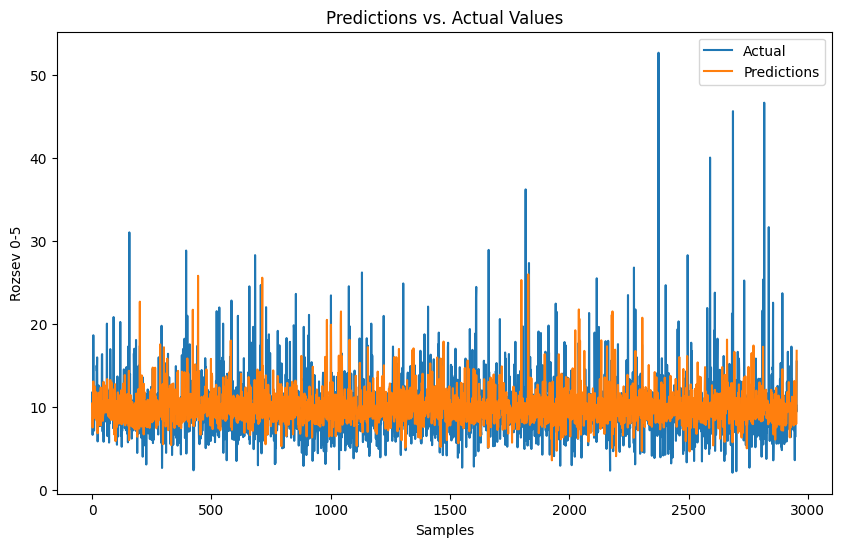

In [10]:


plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predictions')

plt.xlabel('Samples')
plt.ylabel('Rozsev 0-5')
plt.title('Predictions vs. Actual Values')
plt.legend()
plt.show()